In [1]:
import gzip
from collections import defaultdict

def readGz(f):
  for l in gzip.open(f):
    yield eval(l)


### Would-purchase baseline: just rank which businesses are popular and which are not, and return '1' if a business is among the top-ranked




In [2]:
businessCount = defaultdict(int)
totalPurchases = 0

for l in readGz("train.json.gz"):
  user,business = l['reviewerID'],l['itemID']
  businessCount[business] += 1
  totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases/2: break

predictions = open("predictions_Purchase.txt", 'w')
for l in open("pairs_Purchase.txt"):
  if l.startswith("reviewerID"):
    #header
    predictions.write(l)
    continue
  u,i = l.strip().split('-')
  if i in return1:
    predictions.write(u + '-' + i + ",1\n")
  else:
    predictions.write(u + '-' + i + ",0\n")

predictions.close()


In [3]:
#part1
businessCountTrain = defaultdict(int)
businessCountVal = defaultdict(int)
totalPurchases = 0
userSet = {}
itemSet = {}
businessCount = defaultdict(int)
for l in readGz("train.json.gz"):
    if totalPurchases < 100000:
        userTrain,business = l['reviewerID'],l['itemID']
        businessCountTrain[business] += 1
    else:
        userVal,business = l['reviewerID'],l['itemID']
        businessCountVal[business] += 1 
    totalPurchases += 1

In [4]:
import random

userPurchase = defaultdict(list)
userSet = set()
itemSet = set()
businessCount = defaultdict(int)
valUser = []
valItem = []

totalPurchases = 0
for l in readGz("train.json.gz"):
    user,business = l['reviewerID'],l['itemID']
    userSet.add(user)
    itemSet.add(business)
    userPurchase[user].append(business)
    if totalPurchases < 100000:
        businessCount[business] += 1
    else:
        valUser.append(l['reviewerID'])
        valItem.append(l['itemID'])
    totalPurchases += 1
    
mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()    

print("sort done")

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > 50000: break
    
while(len(valUser) < 200000):
    newUser = random.sample(userSet,1)
    newItem = random.sample(itemSet,1)
    if newItem[0] not in userPurchase[newUser[0]]:
        valUser.append(newUser[0])
        valItem.append(newItem[0])
    if (len(valUser) % 10000 == 0) :
        print(len(valUser))
    
print("val set done")

count = 0
for i in range(len(valItem)):
    if i < 100000:
        if valItem[i] in return1:
            count += 1
    else:
        if valItem[i] not in return1:
            count += 1
print(count*1.0/200000)
    

sort done
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
val set done
0.629145


5144


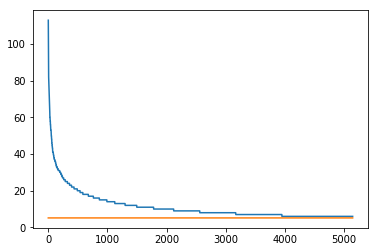

58823


In [26]:
import matplotlib.pyplot as plt

cnts = []
digit = []
avg = []
avgCount = 100000/len(mostPopular)
totalCount = 0

for i in range(len(mostPopular)):
    cnts.append(mostPopular[i][0])
    digit.append(i+1)
    avg.append(avgCount)
    totalCount += mostPopular[i][0]
    if (mostPopular[i][0] -1 < avgCount and mostPopular[i+1][0] < avgCount):
        print(i)
        break

plt.plot(digit,cnts)
plt.plot(digit,avg)
plt.show()
print(totalCount)

In [28]:
#2

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > 53000: break
    
count = 0
for i in range(len(valItem)):
    if i < 100000:
        if valItem[i] in return1:
            count += 1
    else:
        if valItem[i] not in return1:
            count += 1
print(count*1.0/200000)

0.629875


In [11]:
len(return1)

4025

In [12]:
#3
# map categories to items
# in training set, 
# userCate, key: userID, value:
userCate = defaultdict(set)
#item, id --> 
#test
# item --> categories, one is this user, then ok
itemCate = defaultdict(set)
i = 0
#key, user, value list of items bought more than once
for l in readGz("train.json.gz"):
    if i < 100000: 
        user,category,item = l['reviewerID'],l['categories'],l['itemID']
        for feature in category:
            userCate[user].add(tuple(feature))
            itemCate[item].add(tuple(feature))
        i += 1
    else:
        break


In [18]:
count = 0
for i in range(100000):
    for feature in itemCate[valItem[i]]: 
        if feature in userCate[valUser[i]]:
            count += 1
            break
            
# print(count)
for i in range(100000,200000):
    flag = 1
    for feature in itemCate[valItem[i]]:
        if feature in userCate[valUser[i]]:
            flag = 0
    if flag:
        count += 1

print("accuracy = ", count * 1.0 / 200000) #this doesnt count because valItem, valUser

accuracy =  0.59328


In [ ]:
for item in itemCate['I402344648']:
    print(item)
    print(1)

In [ ]:
len(userCate)

In [51]:
predictions = open("result.csv", 'w')
for l in open("pairs_Purchase.txt"):
    flag = 1
    if l.startswith("reviewerID"):
    #header
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    for feature in itemCate[i]:
        if feature in userCate[u]:
            predictions.write(u + '-' + i + ",1\n")
            flag = 0
            break
    if flag:
        predictions.write(u + '-' + i + ",0\n")

predictions.close()



In [2]:
userRatings = defaultdict(list)
i = 0

reviewer = []
rate = []
valItem = []
allRatings = []

#take first 100000 data as the training set
for l in readGz("train.json.gz"):
    user,business,score = l['reviewerID'],l['itemID'],l['rating'] 
    if i < 100000:
        allRatings.append(score)
        userRatings[user].append(score)
    else:
        reviewer.append(user)
        rate.append(score)
        valItem.append(business)
        
    i += 1

globalAverage = sum(allRatings) / len(allRatings)
userAverage = {}
for u in userRatings:
    userAverage[u] = sum(userRatings[u]) / len(userRatings[u])

#we use the MSE to evaluate the performance of the validation set
error = 0
for i in range(len(reviewer)):
    if reviewer[i] in userRatings:
        error += (rate[i] - userAverage[reviewer[i]])**2 * 1.0 / 100000
    else:
        error += (rate[i] - globalAverage)**2 * 1.0 / 100000

In [3]:
print("error",error)
print("globalAvg",globalAverage)


error 1.4976080782956405
globalAvg 4.232


In [4]:
#6 

#initialization
alpha = 0
setI = defaultdict(set)
setU = defaultdict(set)
betaI = defaultdict(float)
betaU = defaultdict(float)
RUI = defaultdict(float)
userRatings = defaultdict(list)
lamb = 1
i = 0
allRatings = []

userID = []
itemID = []
for l in readGz("train.json.gz"):
    user, item = l['reviewerID'],l['itemID']
    score = l['rating']
    if i < 100000:
        userRatings[user].append(score)
        allRatings.append(score)
        itemID.append(item)
        userID.append(user)
        RUI[(user,item)] = score
        setI[item].add(user) #item to all related users
        setU[user].add(item) #user to all related items
        betaI[item] = 0
        betaU[user] = 0
    else:
        break
    i += 1    
    

In [5]:
preError = 100
error = 0
for i in range(len(userID)):
    error += (allRatings[i] - alpha - betaU[userID[i]] - betaI[itemID[i]]) ** 2 / 100000
    
while (abs(preError - error) > 0.01):
    preError = error
    
    totalSum = 0
    for key in RUI:
        totalSum += (RUI[key] - betaU[key[0]] - betaI[key[1]])
    alpha = totalSum/100000

    for key in setU: #user
        totalSum = 0
        for item in setU[key]: #item 
            totalSum += (RUI[(key,item)] - alpha - betaI[item])
        betaU[key] = totalSum/(lamb + len(setU[key]))

    for key in setI: #item
        totalSum = 0
        for user in setI[key]: #user 
            totalSum += (RUI[(user,key)] - alpha - betaU[user])
        betaI[key] = totalSum/(lamb + len(setI[key]))
    
    error = 0
    for i in range(len(userID)):
        error += (allRatings[i] - alpha - betaU[userID[i]] - betaI[itemID[i]]) ** 2 / 100000
        
    print("alpha"+str(alpha))
    print("pre"+ str(preError))
    print("error"+ str(error))

alpha4.232
pre19.13873999999818
error0.5488708401393503
alpha4.231707482679162
pre0.5488708401393503
error0.5198608575784793
alpha4.23136608138603
pre0.5198608575784793
error0.5152086793402938


4.23136608138603

In [7]:
preError

0.5198608575784793

In [8]:
#7
maxBi = -10000
maxBu = -10000
minBi = 10000
minBu = 10000

for item in betaI:
    if maxBi < betaI[item]:
        maxBi = betaI[item]
        maxID = item
    
    if minBi > betaI[item]:
        minBi = betaI[item]
        minID = item
    
for item in betaU:
    if maxBu < betaU[item]:
        maxBu = betaU[item]
        maxUser = item
    
    if minBu > betaU[item]:
        minBu = betaU[item]
        minUser = item
    
print('maxID' + maxID)
print('minID' + minID)
print('maxUser' + maxUser)
print('minUser' + minUser)

maxIDI809804570
minIDI511389419
maxUserU605818049
minUserU030961757


In [9]:
error = 0
for i in range(len(reviewer)):
    if reviewer[i] in userRatings:
        error += (rate[i] - alpha - betaU[reviewer[i]] - betaI[valItem[i]])**2 * 1.0 / 100000
    else:
        error += (rate[i] - alpha)**2 * 1.0 / 100000
        
print("mse", error)

mse 1.273523799210286


In [10]:
predictions = open("rating.csv", 'w')
for l in open("pairs_Rating.txt"):
    if l.startswith("reviewerID"):
        predictions.write(l)
        continue
    u,i = l.strip().split('-')    
    if u in userRatings:
        predictions.write(u + '-' + i + ',' + str(alpha + betaU[u] + betaI[i]) + '\n')
    else:
        predictions.write(u + '-' + i + ',' + str(alpha) + '\n')
        
predictions.close()